<a href="https://colab.research.google.com/github/MykhailoKononov/ab_test_results_analysis/blob/main/ab_test_relults_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A/B Test Analysis Summary

# Null Hypothesis:
###The changes do not affect the Conversion Rate (CR) from installation to purchase.

In [3]:
!wget https://raw.githubusercontent.com/MykhailoKononov/ab_test_results_analysis/main/ab_test_data.csv
data = pd.read_csv('ab_test_data.csv')

--2024-11-12 17:36:24--  https://raw.githubusercontent.com/MykhailoKononov/ab_test_results_analysis/main/ab_test_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359904 (1.3M) [text/plain]
Saving to: ‘ab_test_data.csv’

ab_test_data.csv    100%[===================>]   1.30M  --.-KB/s    in 0.06s   

2024-11-12 17:36:25 (20.7 MB/s) - ‘ab_test_data.csv’ saved [1359904/1359904]



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Load the dataset
df = pd.DataFrame(data)

In [5]:
# Overview of dataset statistics, grouped by test group
df.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

In [6]:
# Calculate the number of users in each group
group_a_count = (df['test_group'] == 'a').sum()
group_b_count = (df['test_group'] == 'b').sum()
print(f'Number of users in Group A: {group_a_count}, Group B: {group_b_count}')

Number of users in Group A: 10013, Group B: 9985


In [7]:
# Calculate the number of conversions in each group
group_a_conv_count = df[df['test_group'] == 'a']['conversion'].sum()
group_b_conv_count = df[df['test_group'] == 'b']['conversion'].sum()
print(f'Conversions in Group A: {group_a_conv_count}, Group B: {group_b_conv_count}')

Conversions in Group A: 611, Group B: 889


In [8]:
# Calculate the conversion rate for each group
group_a_conv = group_a_conv_count * 100 / group_a_count
group_b_conv = group_b_conv_count * 100 / group_b_count
print(f'Conversion rate for Group A: {round(group_a_conv, 2)}%, Group B: {round(group_b_conv, 2)}%')

Conversion rate for Group A: 6.1%, Group B: 8.9%


In [9]:
# Determine the start and end dates of the test
start_date = pd.to_datetime(df['timestamp'].min())
end_date = pd.to_datetime(df['timestamp'].max())
duration = (end_date - start_date).days
print(f'Start date: {start_date}, End date: {end_date}, Test duration: {duration} days')

Start date: 2023-07-03 01:42:34.033708, End date: 2023-07-25 01:41:19.152664, Test duration: 21 days


### Group Statistics:
- **Group A**:
  - Number of users: 10,013
  - Number of conversions: 611
  - Conversion Rate (CR): 6.1%

- **Group B**:
  - Number of users: 9,985
  - Number of conversions: 889
  - Conversion Rate (CR): 8.9%

- **Test Duration**: 21 days

In [10]:
# Perform a two-sample t-test to compare conversion rates
alpha = 0.05
statistic, pvalue = stats.ttest_ind(
    df[df['test_group'] == 'a']['conversion'],
    df[df['test_group'] == 'b']['conversion'],
    alternative='less'
)

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant; Null Hypothesis is rejected.')
else:
    print('The difference is not statistically significant; Null Hypothesis cannot be rejected.')

t-statistic: -7.53, p-value: 0.0
The difference is statistically significant; Null Hypothesis is rejected.


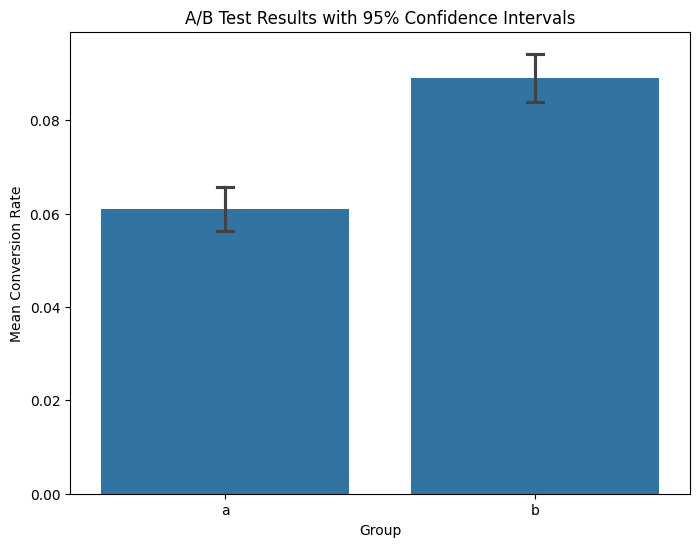

In [11]:
# Plot (1) bar chart with 95% confidence intervals
plt.figure(figsize=(8, 6))
sns.barplot(
    x=df['test_group'],
    y=df['conversion'],
    errorbar=('ci', 95),
    capsize=0.05
)
plt.title('A/B Test Results with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Mean Conversion Rate')
plt.show()

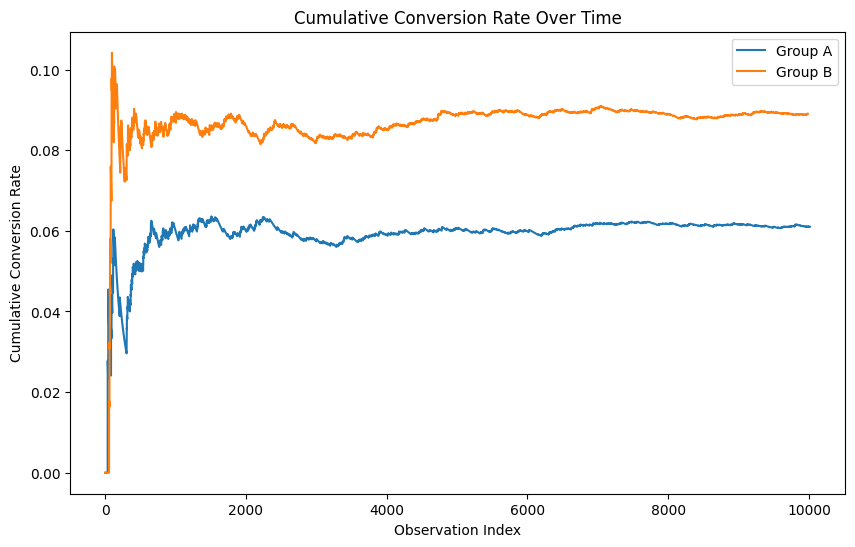

In [12]:
# Calculate and plot (2) the cumulative conversion rate over time
df['timestamp'] = pd.to_datetime(df['timestamp'])
sorted_df = df.sort_values(by='timestamp')

cumulative_metric_a = sorted_df[sorted_df['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = sorted_df[sorted_df['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='Group A')
plt.plot(cumulative_metric_b, label='Group B')

plt.title('Cumulative Conversion Rate Over Time')
plt.xlabel('Observation Index')
plt.ylabel('Cumulative Conversion Rate')
plt.legend()
plt.show()

---

### Analysis:

1. **Initial Evaluation**:
   Using an online A/B test calculator with a 95% confidence level (https://abtestguide.com/calc/?ua=10013&ub=9985&ca=611&cb=889), we determine that the results suggest a statistically significant difference between the two groups.

2. **Visual Confirmation**:
   To ensure accuracy, we visualize the data in Python. First, we plot a bar chart with 95% confidence intervals (Plot 1). The 95% confidence intervals for both groups do not overlap, which supports the rejection of the null hypothesis.

3. **Cumulative Conversion Rate**:
   Finally, we plot the cumulative conversion rates over time (Plot 3). The conversion rate for Group B consistently exceeds that of Group A, reinforcing our findings.

---

### Conclusion:

With 95% confidence, we can reject the null hypothesis and proceed with implementing the design changes in Group B.